In [31]:
import pandas as pd
import os
import re
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import balanced_accuracy_score, f1_score, roc_auc_score, precision_score, accuracy_score

from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay, confusion_matrix
from sklearn.model_selection import learning_curve, validation_curve

In [2]:
df = pd.read_csv("dataset/processed_data/processed_data.csv")
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,family_history_with_overweight_yes,...,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,NObeyesdad,NObeyesdad_encoded
0,21.0,1.62,64.0,2.0,3.0,2.0,0.0,1.0,0,1,...,0,0,1,0,0,0,1,0,Normal_Weight,1
1,21.0,1.52,56.0,3.0,3.0,3.0,3.0,0.0,0,1,...,0,1,0,0,0,0,1,0,Normal_Weight,1
2,23.0,1.80,77.0,2.0,3.0,2.0,2.0,1.0,1,1,...,1,0,0,0,0,0,1,0,Normal_Weight,1
3,27.0,1.80,87.0,3.0,3.0,2.0,2.0,0.0,1,0,...,1,0,0,0,0,0,0,1,Overweight_Level_I,5
4,22.0,1.78,89.8,2.0,1.0,2.0,0.0,0.0,1,0,...,0,1,0,0,0,0,1,0,Overweight_Level_II,6


In [3]:
df.columns

Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE',
       'Gender_Male', 'family_history_with_overweight_yes', 'FAVC_yes',
       'SMOKE_yes', 'SCC_yes', 'CAEC_Always', 'CAEC_Frequently',
       'CAEC_Sometimes', 'CAEC_no', 'CALC_Always', 'CALC_Frequently',
       'CALC_Sometimes', 'CALC_no', 'MTRANS_Automobile', 'MTRANS_Bike',
       'MTRANS_Motorbike', 'MTRANS_Public_Transportation', 'MTRANS_Walking',
       'NObeyesdad', 'NObeyesdad_encoded'],
      dtype='object')

In [4]:
X = df.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)
y = df['NObeyesdad_encoded']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, shuffle=True, random_state=2023)

## All Other Models

In [6]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state=2023)
adaBoost = AdaBoostClassifier(random_state=2023)
#gbt = GradientBoostingClassifier(random_state=2023)

In [7]:
clfs = {   
    
    'KNeighbors': knn,
    'RandomForest': rf,
    'AdaBoost': adaBoost,
    
    #'GradientBoostingTrees': gbt
}

In [8]:
param_grid = {
    
        
    'KNeighbors': {'n_neighbors':[3,5,9,11,13,15],  # n_neighbors should always be odd numbers
                     'weights': ['distance']},
    
    'RandomForest': {'n_estimators':[100,300,500],
                    'criterion':['gini','log_loss'],
                    'max_depth':[4,8,12,16,20,None],
                    'class_weight': ['balanced',"balanced_subsample"]},
    
    'AdaBoost': {'n_estimators': [50,70,90,100,110,130,160],
                'learning_rate': [10e-3,10e-2,10e-1,1.0]},
    
    #'GradientBoostingTrees': {'loss': ['log_loss', 'exponential'],
    #                         'learning_rate': [10e-2,10e-1,1.0],
    #                         'n_estimators': [100,200,300],
    #                         'max_depth': [3,5,7,8,10,15,20]},
    
           
    }

In [9]:
def train_classifier(clf,parameters):
    
    gs = GridSearchCV(clf,param_grid=parameters, cv=5,refit='roc_auc_ovr_weighted', verbose=3, scoring=['f1_weighted','roc_auc_ovr_weighted','balanced_accuracy']).fit(X_train, y_train)
    #y_pred = gs.predict(X_test)    
    
    
    return gs

In [17]:
tuned_models = []

for name,clf in clfs.items():
    
    print("\nFor ",name)
    parameters = param_grid[name]
    current_best_model = train_classifier(clf,parameters)
    
    ####### Saving Trainined MOdel #####################
    
    # create the directory if it does not exist
    #if not os.path.exists('../tuned_models'):
    #    os.makedirs('../tuned_models')
    
    os.makedirs("Models/Classification_models", exist_ok=True)
    
    filename = 'tuned_' + re.search(r'^[^\(]+', str(current_best_model.best_estimator_))[0] + '_model.pkl'
    filepath = os.path.join('Models/Classification_models', filename)
    with open(filepath, 'wb') as file:
        pickle.dump(current_best_model, file)
            
    ##############################################################################
    
    tuned_models.append(current_best_model)


For  KNeighbors
Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END n_neighbors=3, weights=distance; balanced_accuracy: (test=0.896) f1_weighted: (test=0.896) roc_auc_ovr_weighted: (test=0.982) total time=   0.0s
[CV 2/5] END n_neighbors=3, weights=distance; balanced_accuracy: (test=0.862) f1_weighted: (test=0.863) roc_auc_ovr_weighted: (test=0.966) total time=   0.0s
[CV 3/5] END n_neighbors=3, weights=distance; balanced_accuracy: (test=0.878) f1_weighted: (test=0.878) roc_auc_ovr_weighted: (test=0.962) total time=   0.0s
[CV 4/5] END n_neighbors=3, weights=distance; balanced_accuracy: (test=0.864) f1_weighted: (test=0.865) roc_auc_ovr_weighted: (test=0.967) total time=   0.0s
[CV 5/5] END n_neighbors=3, weights=distance; balanced_accuracy: (test=0.877) f1_weighted: (test=0.874) roc_auc_ovr_weighted: (test=0.964) total time=   0.0s
[CV 1/5] END n_neighbors=5, weights=distance; balanced_accuracy: (test=0.906) f1_weighted: (test=0.905) roc_auc_ovr_weighted: (test=0

# Model Import & Model Scores

In [18]:

AdaBoost_model = pickle.load(open('Models/Classification_models/tuned_AdaBoostClassifier_model.pkl','rb'))
#GBDT_model = pickle.load(open('Models/Classification_models/tuned_GradientBoostingClassifier_model.pkl','rb'))
knn_model = pickle.load(open('Models/Classification_models/tuned_KNeighborsClassifier_model.pkl','rb'))
RF_model = pickle.load(open('Models/Classification_models/tuned_RandomForestClassifier_model.pkl','rb'))





In [23]:
model_scores = pd.DataFrame({
    'model': ['KNN','AdaBoost','RF'],
    'balanced_accuracy_train': [
                                balanced_accuracy_score(y_train,knn_model.best_estimator_.predict(X_train)),
                                balanced_accuracy_score(y_train,AdaBoost_model.best_estimator_.predict(X_train)),
                                
                                balanced_accuracy_score(y_train,RF_model.best_estimator_.predict(X_train)),
                                
                                
                               ]})


balanced_accuracy_test =  [
                           balanced_accuracy_score(y_test,knn_model.best_estimator_.predict(X_test)),
                           balanced_accuracy_score(y_test,AdaBoost_model.best_estimator_.predict(X_test)),
                           
                           balanced_accuracy_score(y_test,RF_model.best_estimator_.predict(X_test)),                 
                           
                          ] 

f1_score_train = [                  
                  f1_score(y_train,knn_model.best_estimator_.predict(X_train), average="weighted"),
                  f1_score(y_train,AdaBoost_model.best_estimator_.predict(X_train), average="weighted"),                  
                  f1_score(y_train,RF_model.best_estimator_.predict(X_train), average="weighted"),
                  
                                   
                 ]


f1_score_test = [                 
                 f1_score(y_test,knn_model.best_estimator_.predict(X_test), average="weighted"),
                 f1_score(y_test,AdaBoost_model.best_estimator_.predict(X_test), average="weighted"),
                 
                 f1_score(y_test,RF_model.best_estimator_.predict(X_test), average="weighted"),
                 
                ]

roc_auc_train =  [
                  
                  roc_auc_score(y_train,knn_model.best_estimator_.predict_proba(X_train), multi_class='ovr', average='weighted'),
                  roc_auc_score(y_train,AdaBoost_model.best_estimator_.predict_proba(X_train), multi_class='ovr', average='weighted'),
                  
                  roc_auc_score(y_train,RF_model.best_estimator_.predict_proba(X_train), multi_class='ovr', average='weighted'),
                  
                 ]

roc_auc_test = [               
                roc_auc_score(y_test,knn_model.best_estimator_.predict_proba(X_test), multi_class='ovr', average='weighted'),
                roc_auc_score(y_test,AdaBoost_model.best_estimator_.predict_proba(X_test), multi_class='ovr', average='weighted'),
                
                roc_auc_score(y_test,RF_model.best_estimator_.predict_proba(X_test), multi_class='ovr', average='weighted'),
                
                ] 

precision_train =  [
                    
                    precision_score(y_train,knn_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),
                    precision_score(y_train,AdaBoost_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),                    
                    precision_score(y_train,RF_model.best_estimator_.predict(X_train), zero_division=0, average='weighted'),                    
                    
                   ]

precision_test = [                  
                  precision_score(y_test,knn_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),
                  precision_score(y_test,AdaBoost_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),                  
                  precision_score(y_test,RF_model.best_estimator_.predict(X_test), zero_division=0, average='weighted'),                                    
                 ] 


accuracy_train =  [                   
                   accuracy_score(y_train,knn_model.best_estimator_.predict(X_train)),
                   accuracy_score(y_train,AdaBoost_model.best_estimator_.predict(X_train)),                   
                   accuracy_score(y_train,RF_model.best_estimator_.predict(X_train)),                   
                 ]


accuracy_test =  [
                  accuracy_score(y_test,knn_model.best_estimator_.predict(X_test)),
                  accuracy_score(y_test,AdaBoost_model.best_estimator_.predict(X_test)),                  
                  accuracy_score(y_test,RF_model.best_estimator_.predict(X_test)),             
                 ] 





best_score= [knn_model.best_score_, AdaBoost_model.best_score_, RF_model.best_score_]

#################################################################################

model_scores['balanced_accuracy_test'],model_scores['f1_weighted_train'],model_scores['f1_weighted_test'],model_scores['roc_auc_ovr_weighted_train'],model_scores['roc_auc_ovr_weighted_test'],model_scores['precision_train'],model_scores['precision_test'],model_scores['accuracy_train'],model_scores['accuracy_test'] = [balanced_accuracy_test,f1_score_train,f1_score_test,roc_auc_train,roc_auc_test, precision_train,precision_test,accuracy_train,accuracy_test]

model_scores.insert(1,'best_score',best_score)

##############################################################################

os.makedirs("Models/Classification_models/Scores", exist_ok=True)
model_scores.to_csv('Models/Classification_models/Scores/model_scores.csv',index=False)

########################

model_scores.style.highlight_max(axis=0)


,model,best_score,balanced_accuracy_train,balanced_accuracy_test,f1_weighted_train,f1_weighted_test,roc_auc_ovr_weighted_train,roc_auc_ovr_weighted_test,precision_train,precision_test,accuracy_train,accuracy_test
0,KNN,0.978406,1.000000,0.850957,1.000000,0.841652,1.000000,0.982033,1.000000,0.865120,1.000000,0.851675
1,AdaBoost,0.863850,0.351916,0.341093,0.267107,0.259303,0.867844,0.864204,0.225857,0.229608,0.360695,0.346890
2,RF,0.996214,1.000000,0.937960,1.000000,0.940815,1.000000,0.996471,1.000000,0.943144,1.000000,0.940191


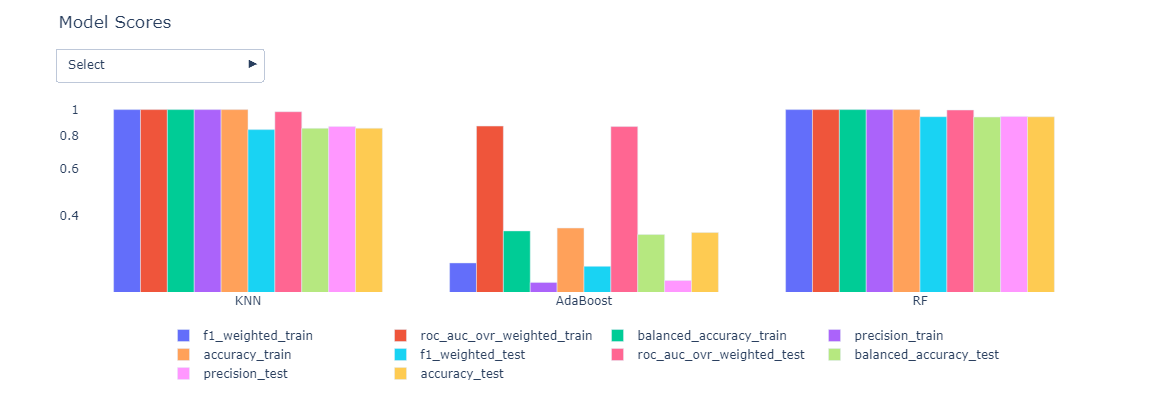

In [25]:
############################################################################################
df  = pd.read_csv('Models/Classification_models/Scores//model_scores.csv')
#df = df.drop('Unnamed: 0', axis =1)
df = df.set_index('model')
df1 = df[['f1_weighted_train','roc_auc_ovr_weighted_train','balanced_accuracy_train','precision_train','accuracy_train']]
df2 = df[['f1_weighted_test','roc_auc_ovr_weighted_test','balanced_accuracy_test','precision_test','accuracy_test']]

#########################################################
import plotly.graph_objects as go


def multi_plot(df1,df2, title, addAll = True):
    
    fig = go.Figure()
    

    for column1 in df1.columns.to_list():
        f1= fig.add_trace(
            go.Bar(
                x = df1.index,
                y = df1[column1],
                name = column1,
            )
        )

    for column2 in df2.columns.to_list():
        fig.add_trace(
            go.Bar(
                x = df2.index,
                y = df2[column2],
                name = column2
            )
        )


    button_all = [dict(label = 'Train',
                      method = 'update',
                      args = [{'visible': df1.columns.isin(df1.columns),
                               'title': 'All',
                               'showlegend':True}]),
                  dict(label = 'Select',
                      method = 'update',
                      args = [{'visible': df2.columns.isin(df2.columns),
                               'title': 'All',
                               'showlegend':True}]),
                  
                  ]
                 
                

    def create_layout_button(column1):
        return dict(label = column1,
                    method = 'update',
                    args = [{'visible': df1.columns.isin([column1]),
                             'title': column1,
                             'showlegend': True}])
    
    def create_layout_button2(column2):
        return dict(label = column2,
                    method = 'update',
                    args = [{'visible': df2.columns.isin([column2]),
                             'title': column2,
                             'showlegend': True}]
                   )
    # Update remaining layout properties

    fig.update_layout(
        updatemenus=[
          
            
            go.layout.Updatemenu(
            active = 0,
            visible=True,
            buttons = ([button_all[1]] * addAll) + list(df2.columns.map(lambda column: create_layout_button2(column))),
               
            direction="right",
            pad={"r": 5, "t": 5,"l":5},
            showactive=True,
            x=-0.03,
            xanchor="left",
            y=1.1,
            yanchor="bottom"),
            
            
            
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        title_y=0.96,
        
        height=400,
        #width = 1000,
        showlegend=True,
        legend=dict(yanchor="bottom",
                                  y=-0.5,
                                  xanchor="center",
                                  x=0.5,
                                  orientation='h'),
        paper_bgcolor = "rgba(0,0,0,0)",
        plot_bgcolor = "rgba(0,0,0,0)",
        margin_autoexpand=True,
        autosize=True,
        
    )
    
    fig.show(scale=200, config= dict(displayModeBar = False))
       
    ############################################################
    
    # Writing and exporting interactive figure as html file 
    
    f1.write_html('Models/Classification_models/Scores/Model_Scores.html',config= dict(displayModeBar = False))
        
########################################################################################

multi_plot(df1,df2, title="Model Scores")  

#https://towardsdatascience.com/how-to-create-an-interactive-dropdown-in-jupyter-322277f58a68

# Learning Curve


For  AdaBoost

For  KNN

For  RF


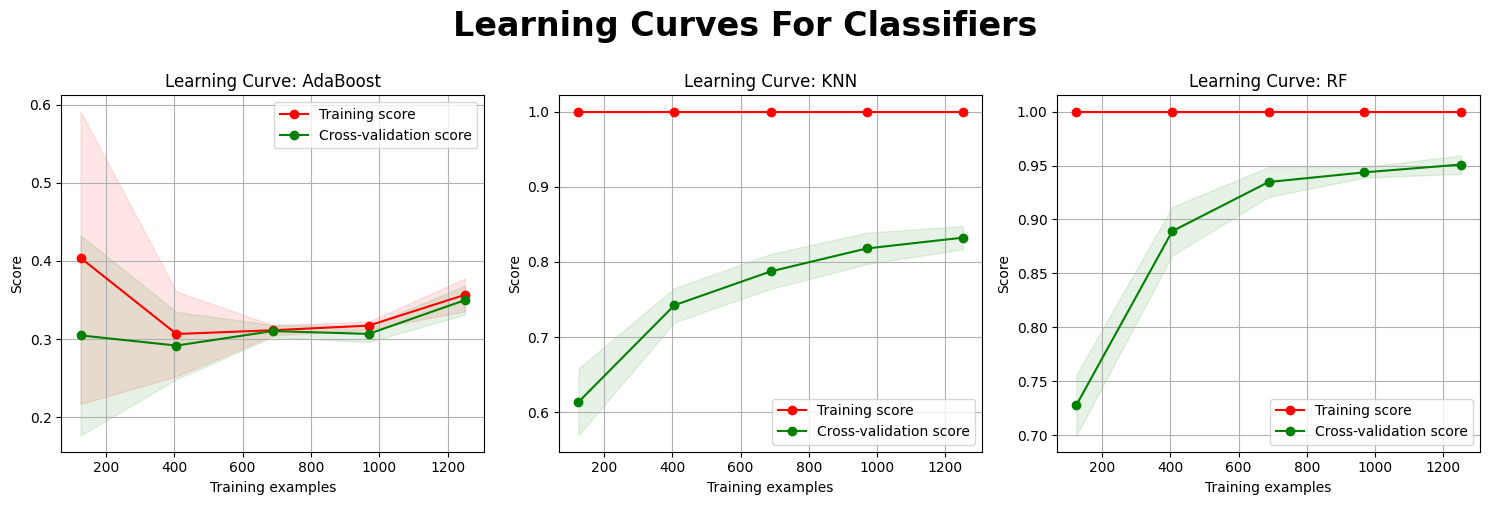

In [32]:
############## LEARNING CURVE #####################


#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve


############################################

#################################################
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
fig.suptitle('Learning Curves For Classifiers', fontsize=24, fontweight='bold', y=1.0)
axes = axes.flatten()
i = 0
###################################################


#for name, clf in {'SVM':svm_model, "AdaBoost":AdaBoost_model, "GBDT":GBDT_model,"KNN":knn_model,"LogReg":lr_model,"RF":RF_model}.items():
model = {"AdaBoost":AdaBoost_model, "KNN":knn_model,"RF":RF_model}


for name, clf in model.items():
    print("\nFor ",name)
    #parameters = param_grid[name]
    #gs = grid_search(clf,parameters)
    
    ax = axes[i]
    i +=1
   
    # split dataset into training and test data
    train_sizes, train_scores, test_scores = learning_curve(clf.best_estimator_, X_train, y_train,
                                                            cv=4,
                                                            verbose=0,
                                                            random_state= 2023,
                                                            #scoring=scoring,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                           )
    
    # calculate mean and standard deviation of training and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # plot learning curve
    #plt.figure()
    ax.set_title(f'Learning Curve: {name}')
    ax.set_xlabel('Training examples')
    ax.set_ylabel('Score')
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='g')
    ax.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    ax.plot(train_sizes, test_scores_mean, 'o-', color='g', label='Cross-validation score')
    
    ax.legend(loc='best')

plt.tight_layout()    
    
#if not os.path.exists('../Results/Results_Classification/LearningCurve_raw4_3_without_month'):
#    os.makedirs('../Results/Results_Classification/LearningCurve_raw4_3_without_month')

os.makedirs(f"Results/LearningCurve_resampled", exist_ok=True)
plt.savefig(f'Results/LearningCurve_resampled/LearningCurve.svg',format='svg',dpi=500)
    
plt.show()

    
    



# Complexity Aanalysis


For  AdaBoost

For  KNN

For  RF


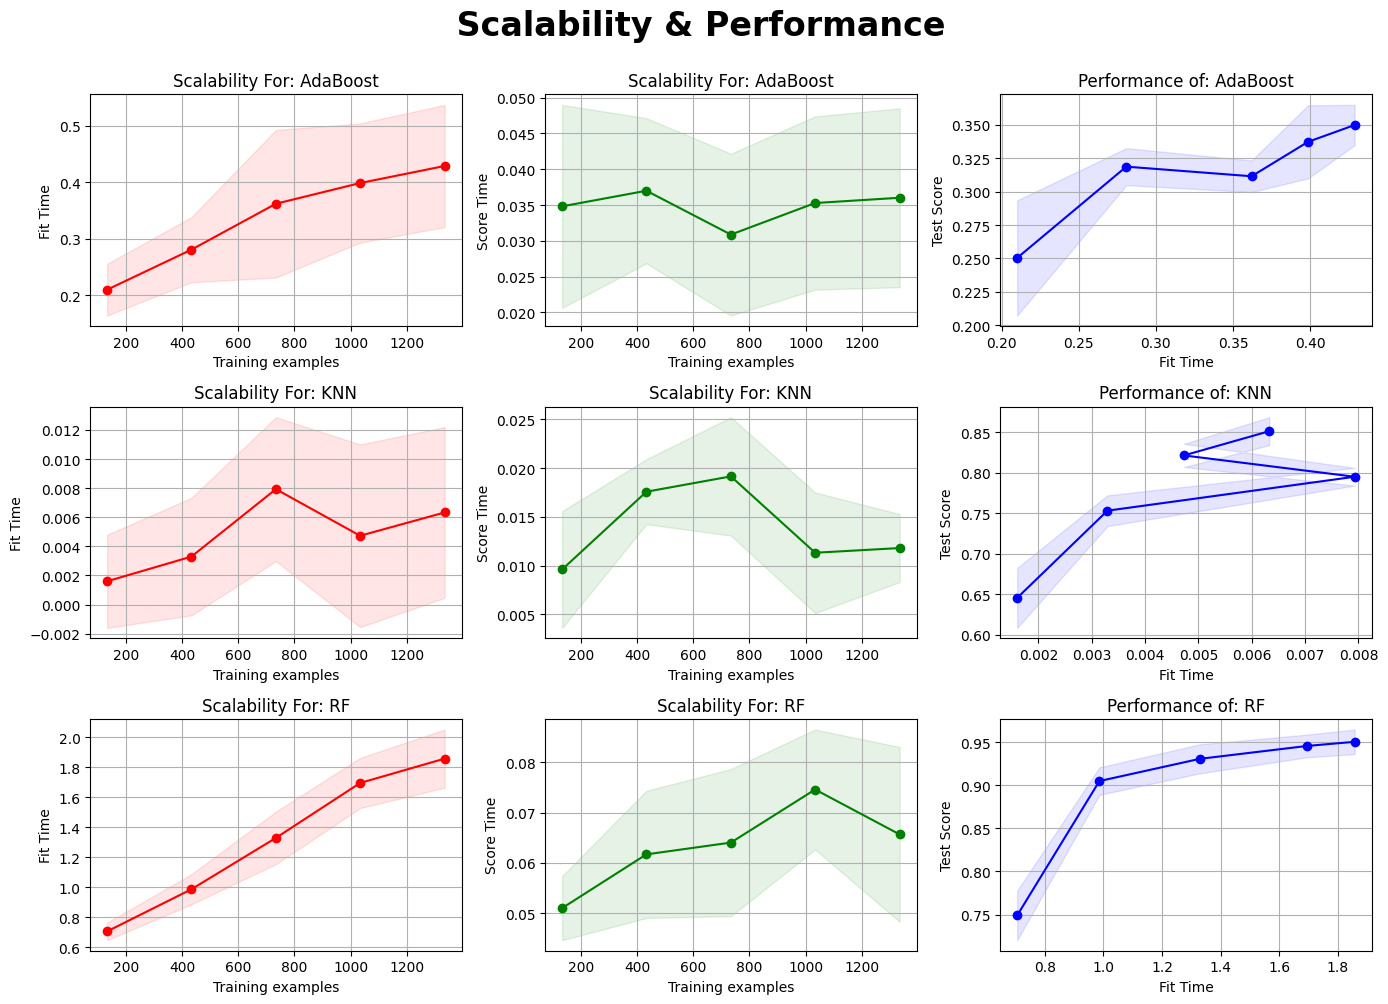

In [36]:
#import numpy as np
#import matplotlib.pyplot as plt
#from sklearn.model_selection import learning_curve


############################################

#################################################
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 10))
fig.suptitle(' Scalability & Performance', fontsize=24, fontweight='bold', y=1.0)
axes = axes.flatten()
i = 0
###################################################


#for name, clf in {'SVM':svm_model, "AdaBoost":AdaBoost_model, "GBDT":GBDT_model,"KNN":knn_model,"LogReg":lr_model,"RF":RF_model}.items():
model = {"AdaBoost":AdaBoost_model,"KNN":knn_model,"RF":RF_model}


for name, clf in model.items():
    print("\nFor ",name)
    
    ax = axes[i]
    ax2 = axes[i+1]
    ax3 = axes[i+2]
    i +=3
   
    # split dataset into training and test data
    train_sizes, train_scores, test_scores, fit_time, score_time = learning_curve(clf.best_estimator_, X_train, y_train,
                                                            cv=5,
                                                            verbose=0,
                                                            random_state=2023,
                                                            #scoring=scoring,
                                                            train_sizes=np.linspace(0.1, 1.0, 5),
                                                           return_times=True)
    
    # calculate mean and standard deviation of training and test scores
    fit_time_mean = np.mean(fit_time, axis=1)
    fit_time_std = np.std(fit_time, axis=1)
    
    score_time_mean = np.mean(score_time, axis=1)
    score_time_std = np.std(score_time, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    

    # plot learning curve
    #plt.figure()
    ax.set_title(f'Scalability For: {name}')
    ax2.set_title(f'Scalability For: {name}')
    ax3.set_title(f'Performance of: {name}')
    
    ax.set_xlabel('Training examples')
    ax2.set_xlabel('Training examples')
    ax3.set_xlabel('Fit Time')
    
    ax.set_ylabel('Fit Time')
    ax2.set_ylabel('Score Time')
    ax3.set_ylabel('Test Score')
    
    ax.grid()
    ax2.grid()
    ax3.grid()
    
    ax.fill_between(train_sizes, fit_time_mean - fit_time_std, fit_time_mean + fit_time_std, alpha=0.1, color='r')
    ax2.fill_between(train_sizes, score_time_mean - score_time_std, score_time_mean + score_time_std, alpha=0.1, color='g')
    ax3.fill_between(fit_time_mean, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color='b')
    
    ax.plot(train_sizes, fit_time_mean, 'o-', color='r', label='Fit Time')
    ax2.plot(train_sizes, score_time_mean, 'o-', color='g', label='Score Time')
    ax3.plot(fit_time_mean, test_scores_mean, 'o-', color='b', label='Fit Time vs score')
    
    #ax.legend(loc='best')
    #ax2.legend(loc='best')

plt.tight_layout()    
    
#if not os.path.exists('Results/Results_Classification_resampled/ScalabilityPerformance_resampled'):
#    os.makedirs('Results/Results_Classification_resampled/ScalabilityPerformance_resampled')

os.makedirs(f'Results/ScalabilityPerformance_resampled', exist_ok=True)
plt.savefig(f'Results/ScalabilityPerformance_resampled/ScalabilityPerformance_resampled.svg',format='svg',dpi=600)
    
plt.show()

    
    



# ROC UC Curve

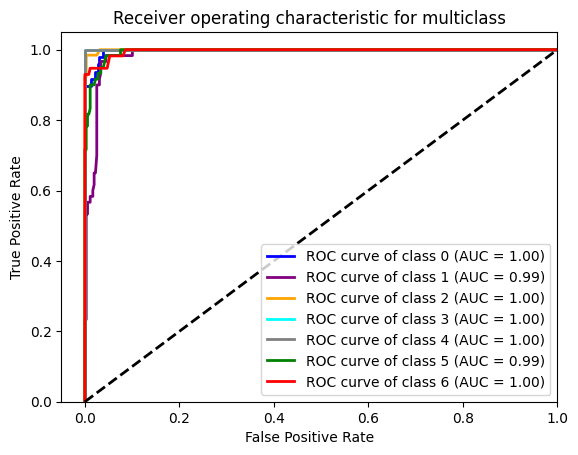

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc


# Compute the predicted probabilities for each class
y_score = RF_model.predict_proba(X_test)

# Compute the ROC curve and ROC AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curves for each class
plt.figure()
lw = 2
colors = ['blue',"purple", 'orange',"cyan","gray",'green','red']
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (AUC = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multiclass')
plt.legend(loc="lower right")


#######################################

os.makedirs(f'Results/ROC_AUC_OVR_Curve', exist_ok=True)
plt.savefig(f'Results/ROC_AUC_OVR_Curve/ROC_AUC_OVR_Curve.svg',format='svg',dpi=600)

##########################
plt.show()

# Confusion Metrix

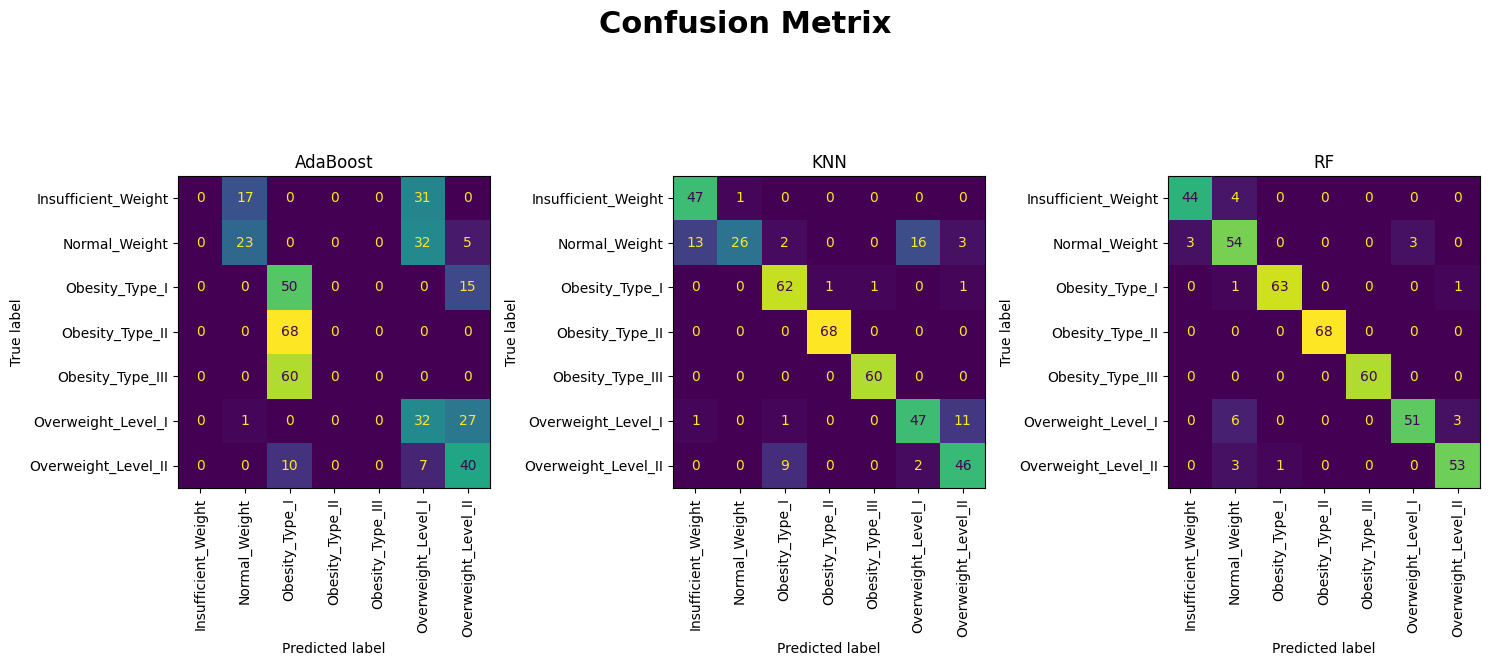

In [46]:
#################################################
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 15), squeeze=True)
fig.suptitle('Confusion Metrix', fontsize=22, fontweight='bold', y=0.7)
axes = axes.flatten()
i = 0
###################################################

#for name, clf in {'SVM':svm_model, "AdaBoost":AdaBoost_model, "GBDT":GBDT_model,"KNN":knn_model,"LogReg":lr_model,"RF":RF_model}.items():

model = {"AdaBoost":AdaBoost_model,"KNN":knn_model,"RF":RF_model}

class_names = ['Insufficient_Weight','Normal_Weight', 'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Overweight_Level_I', 'Overweight_Level_II']

for name, clf in model.items():
    #print("\nFor ",name)
    
    ax = axes[i]
    
    confusionMetrix = ConfusionMatrixDisplay.from_estimator(clf.best_estimator_, X=X_test, y= y_test, display_labels= class_names, xticks_rotation='vertical', ax=ax, colorbar=False)
    ax.set_title(name)
    
    i +=1

plt.tight_layout()    

#################################

os.makedirs("Results/ConfusionMetrix", exist_ok=True)

#if not os.path.exists('../Results/Results_Classification/ConfusionMetrix_raw4_3'):
#    os.makedirs('../Results/Results_Classification/ConfusionMetrix_raw4_3')

plt.savefig(f'Results/ConfusionMetrix/ConfusionMetrix.svg',format='svg',dpi=600)
########
plt.show()